In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [236]:
df = pd.read_csv("df_final.csv")
df

,country,code,year,stress,agriculture_water,industry_water,domestic_water,water_per_capita,urban_population,state_capacity,cattle,total_withdrawals,cereal_yield,control_of_corruption,hydro_electricity,permanent_cropland,population_density,ln_stress
0,Afghanistan,AFG,2000,54.76,0.989050,0.006161,0.004577,0.007439,0.150751,0.213500,0.016537,0.030923,0.021020,0.133944,0.320168,0.005931,0.003636,4.002960
1,Afghanistan,AFG,2001,54.76,0.988170,0.006562,0.005056,0.007384,0.151743,0.195108,0.014174,0.030923,0.026476,0.143635,0.320168,0.005985,0.003665,4.002960
2,Afghanistan,AFG,2002,54.76,0.987291,0.006961,0.005535,0.006922,0.152745,0.185438,0.019679,0.030923,0.044531,0.138723,0.320168,0.005985,0.003922,4.002960
3,Afghanistan,AFG,2003,54.76,0.986414,0.007360,0.006013,0.006419,0.153748,0.096132,0.017978,0.030923,0.038764,0.117124,0.320168,0.005985,0.004245,4.002960
4,Afghanistan,AFG,2004,54.76,0.985538,0.007758,0.006489,0.006171,0.155350,0.091771,0.019585,0.030923,0.035409,0.115623,0.320168,0.005985,0.004424,4.002960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,Zimbabwe,ZWE,2011,32.70,0.807948,0.042543,0.149057,0.002896,0.269950,0.444841,0.072318,0.005297,0.015060,0.098218,0.564251,0.009032,0.004111,3.487375
2392,Zimbabwe,ZWE,2012,32.49,0.804082,0.037965,0.157488,0.002844,0.267977,0.454824,0.072518,0.005264,0.018008,0.108391,0.585590,0.009032,0.004190,3.480932
2393,Zimbabwe,ZWE,2013,32.28,0.800167,0.033329,0.166025,0.002783,0.266016,0.448678,0.072593,0.005230,0.017268,0.099601,0.521946,0.009032,0.004286,3.474448
2394,Zimbabwe,ZWE,2014,32.08,0.796202,0.028634,0.174672,0.002722,0.264381,0.488320,0.059065,0.005197,0.021703,0.103153,0.541594,0.009032,0.004386,3.468233


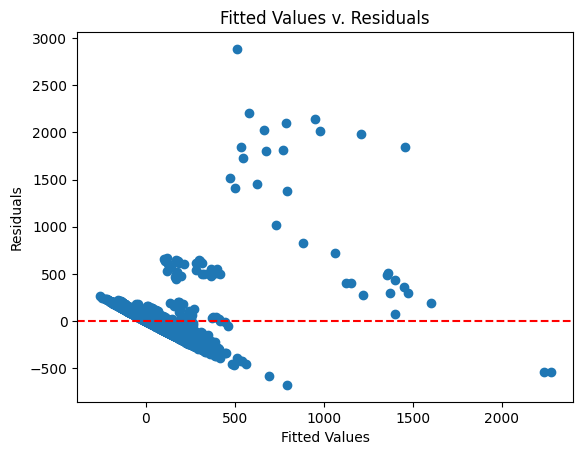

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stress   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     132.2
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          2.89e-269
Time:                        20:02:38   Log-Likelihood:                -16199.
No. Observations:                2396   AIC:                         3.243e+04
Df Residuals:                    2382   BIC:                         3.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               405.2033    120.634      3.359      0.001     168.644     641.763
agriculture_water      -277.1904    118.907     -2.331      0.020    -510.363     -44.018
industry_water         -430.5344    119.423     -3.605      0.000    -664.717    -196.351
domestic_water         -297.4747    115.871     -2.567      0.010    -524.693     -70.257
water_per_capita       -301.7189     41.073     -7.346      0.000    -382.262    -221.176
urban_population        323.1235     24.136     13.388      0.000     275.795     370.452
state_capacity         -768.6606     53.204    -14.447      0.000    -872.992    -664.329
cattle                 -223.2895     55.701     -4.009      0.000    -332.518    -114.062
total_withdrawals       119.7548     66.244      1.808      0.071     -10.148     249.658
cereal_yield           2279.3527     71.409     31.920      0.000    2139.323    2419.382
control_of_corruption   138.9290     38.828      3.578      0.000      62.789     215.069
hydro_electricity        16.1675     18.321      0.882      0.378     -19.760      52.095
permanent_cropland     -135.6045     28.536     -4.752      0.000    -191.562     -79.647
population_density       94.6499     61.613      1.536      0.125     -26.171     215.471
==============================================================================
Omnibus:                     2708.326   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           304997.171
Skew:                           5.676   Prob(JB):                         0.00
Kurtosis:                      57.094   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
model_all_data_no_transformation = smf.ols(formula = 'stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df).fit()
plt.scatter(model_all_data_no_transformation.fittedvalues, model_all_data_no_transformation.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()
model_all_data_no_transformation.summary()

In [238]:
# log transformation
df['ln_stress'] = np.log(df['stress'])

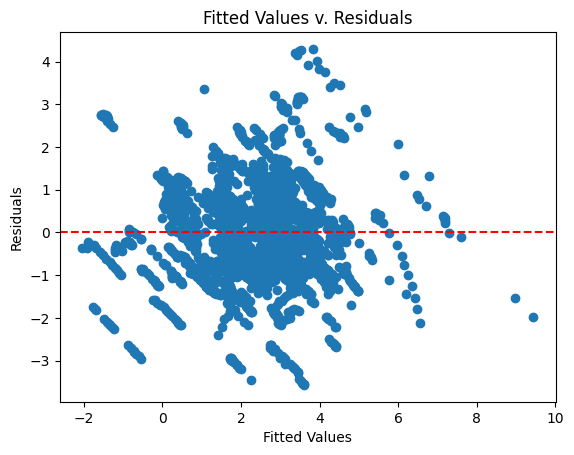

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     267.2
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:02:38   Log-Likelihood:                -3806.8
No. Observations:                2396   AIC:                             7642.
Df Residuals:                    2382   BIC:                             7723.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.1102      0.684     -0.161      0.872      -1.452       1.232
agriculture_water         3.4094      0.675      5.054      0.000       2.086       4.732
industry_water            1.4726      0.678      2.173      0.030       0.144       2.801
domestic_water           -0.7583      0.657     -1.153      0.249      -2.047       0.531
water_per_capita         -5.2154      0.233    -22.379      0.000      -5.672      -4.758
urban_population          1.6592      0.137     12.116      0.000       1.391       1.928
state_capacity           -0.2122      0.302     -0.703      0.482      -0.804       0.380
cattle                   -1.8940      0.316     -5.993      0.000      -2.514      -1.274
total_withdrawals         1.9705      0.376      5.243      0.000       1.233       2.708
cereal_yield              7.1126      0.405     17.555      0.000       6.318       7.907
control_of_corruption    -0.0206      0.220     -0.094      0.925      -0.453       0.411
hydro_electricity        -1.5980      0.104    -15.372      0.000      -1.802      -1.394
permanent_cropland       -1.1674      0.162     -7.211      0.000      -1.485      -0.850
population_density        4.5679      0.350     13.067      0.000       3.882       5.253
==============================================================================
Omnibus:                       48.052   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.706
Skew:                           0.241   Prob(JB):                     8.90e-15
Kurtosis:                       3.644   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
model_all_data = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df).fit()
plt.scatter(model_all_data.fittedvalues, model_all_data.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values v. Residuals')
plt.show()
model_all_data.summary()

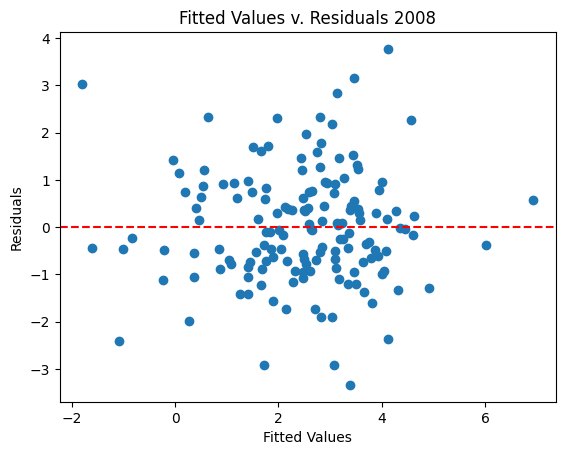

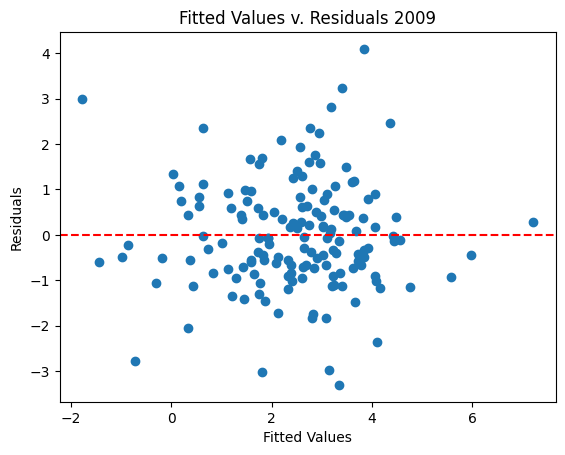

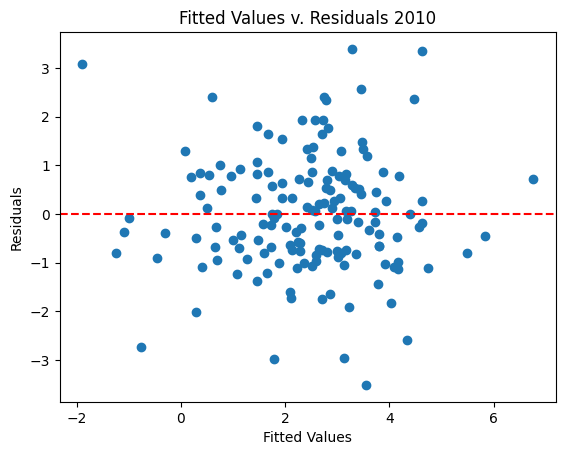

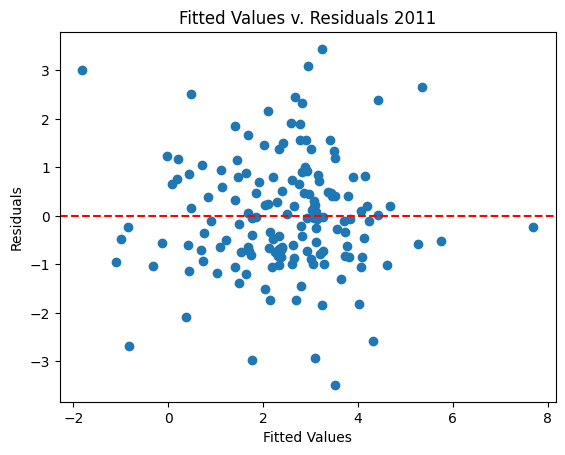

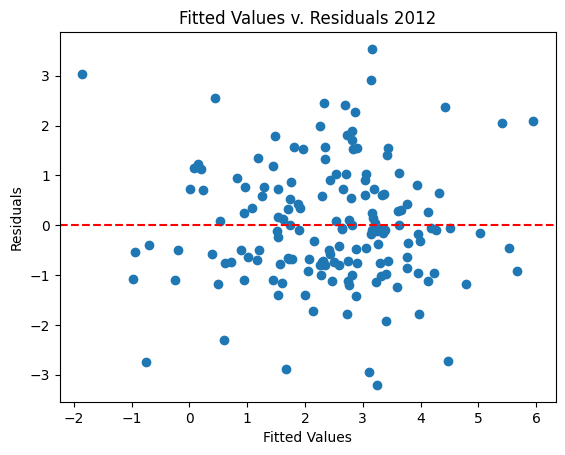

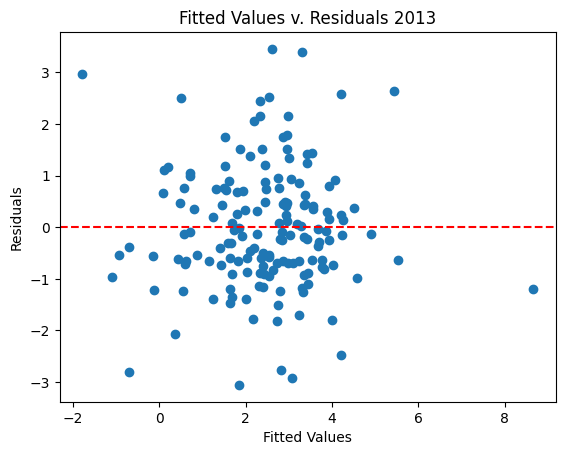

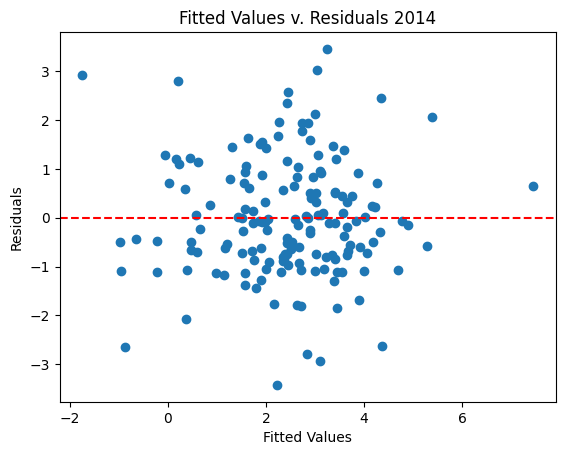

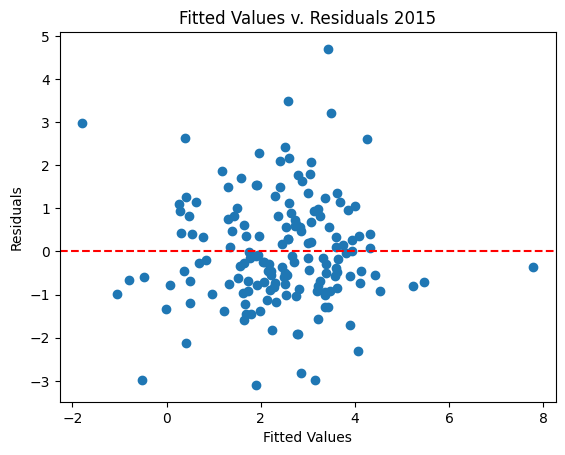

In [240]:
for i in range(2008, 2016, 1):
    df_year = df[df["year"] == i]
    model_year = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df_year).fit()
    plt.scatter(model_year.fittedvalues, model_year.resid)
    plt.axhline(y = 0, color = 'r', linestyle = '--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title(f'Fitted Values v. Residuals {i}')
    plt.show()

In [241]:
# Test Model with smf.ols
df_2015 = df[df["year"] == 2015]
df_2015_train, df_2015_test = train_test_split(df_2015, test_size=0.2, random_state=100)
model_2015 = smf.ols(formula = 'ln_stress~agriculture_water+industry_water+domestic_water+water_per_capita+urban_population+state_capacity+cattle+total_withdrawals+cereal_yield+control_of_corruption+hydro_electricity+permanent_cropland+population_density', data = df_2015_train).fit()
model_2015.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ln_stress   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     10.72
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           1.64e-14
Time:                        20:02:38   Log-Likelihood:                -206.77
No. Observations:                 127   AIC:                             441.5
Df Residuals:                     113   BIC:                             481.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2190      3.710     -0.598      0.551      -9.569       5.131
agriculture_water         5.6052      3.633      1.543      0.126      -1.593      12.803
industry_water            3.7642      3.609      1.043      0.299      -3.385      10.914
domestic_water            1.7674      3.547      0.498      0.619      -5.260       8.795
water_per_capita         -5.0011      1.079     -4.634      0.000      -7.139      -2.863
urban_population          1.1087      0.655      1.694      0.093      -0.188       2.406
state_capacity           -0.7301      1.572     -0.465      0.643      -3.844       2.384
cattle                   -1.8031      1.414     -1.275      0.205      -4.605       0.999
total_withdrawals         2.1398      1.591      1.345      0.181      -1.013       5.293
cereal_yield              6.1286      1.351      4.537      0.000       3.453       8.805
control_of_corruption     0.5220      1.116      0.468      0.641      -1.689       2.733
hydro_electricity        -1.5242      0.509     -2.993      0.003      -2.533      -0.515
permanent_cropland       -0.6801      0.860     -0.790      0.431      -2.385       1.025
population_density        3.4150      1.354      2.523      0.013       0.733       6.097
==============================================================================
Omnibus:                       10.110   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.741
Skew:                           0.467   Prob(JB):                      0.00171
Kurtosis:                       4.239   Cond. No.                         94.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
y = df_2015_test["ln_stress"]
y_pred = model_2015.predict(df_2015_test)
r2_score(y, y_pred)

0.3717605001676154

In [243]:
# Non-Regularized Model with Cross Validation
df_2015_features = df_2015[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]]
df_2015_target = df_2015["ln_stress"]

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_2015[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]])
# df_2015_features[["agriculture_water","industry_water","domestic_water","water_per_capita","urban_population","state_capacity","cattle","total_withdrawals","cereal_yield","control_of_corruption","hydro_electricity","permanent_cropland","population_density"]] = scaled_features

model_1 = LinearRegression()
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_1, df_2015_features, df_2015_target, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [ 0.3717605  -1.17876155 -0.20747272  0.65331087  0.41928813]
Test fold R^2 Mean: 0.011625044403132523
Test fold R^2 STD: 0.6591921574515475


In [244]:
df_2015_features

,agriculture_water,industry_water,domestic_water,water_per_capita,urban_population,state_capacity,cattle,total_withdrawals,cereal_yield,control_of_corruption,hydro_electricity,permanent_cropland,population_density
15,0.984664,0.008155,0.006966,0.004303,0.180450,0.239666,0.014625,0.030923,0.059141,0.114789,0.320168,0.007761,0.006427
31,0.659920,0.012788,0.326552,0.000869,0.682281,0.465074,0.019301,0.013643,0.037190,0.280804,0.001894,0.014703,0.001924
47,0.207185,0.340824,0.451009,0.016234,0.601609,0.417653,0.014449,0.001061,0.025814,0.097824,0.531649,0.008405,0.002688
63,0.741110,0.106158,0.152267,0.020890,0.907394,0.591487,0.287219,0.057477,0.129189,0.294315,0.262258,0.012786,0.001816
79,0.819628,0.033406,0.146948,0.007347,0.597674,0.641069,0.014316,0.004976,0.084345,0.287723,0.282703,0.070999,0.012751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,0.740348,0.035018,0.224059,0.081389,0.870894,0.433077,0.045868,0.034491,0.094517,0.102531,0.636873,0.027822,0.004232
2347,0.950633,0.037443,0.011698,0.012026,0.278604,0.581286,0.037031,0.124856,0.151573,0.322880,0.366004,0.504519,0.037488
2363,0.910053,0.018113,0.071512,0.000218,0.289154,0.164581,0.028400,0.005423,0.020418,0.079077,0.320168,0.019575,0.006717
2379,0.734624,0.082873,0.181992,0.015228,0.366861,0.504968,0.023625,0.002383,0.081467,0.343659,0.969932,0.001797,0.002597


,Lambda,Mean Test R^2
6,0.03,0.331208


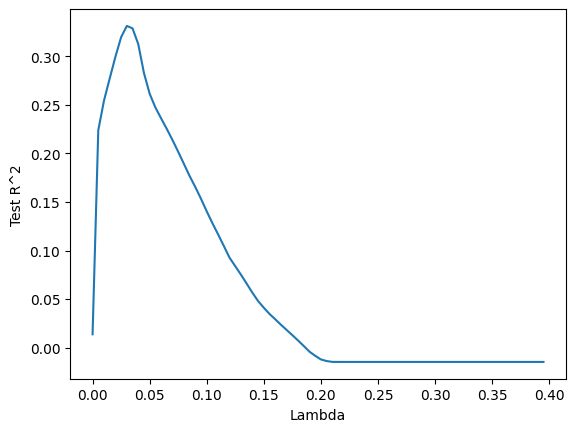

In [270]:
# LASSO Model with Cross Validation
data = []
for i in np.arange(0.0,0.4,0.005):
    temp_model = Lasso(i, max_iter=1000)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, df_2015_features, df_2015_target, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_lasso = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_lasso['Lambda'].values, results_lasso['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_lasso.nlargest(1,"Mean Test R^2")

In [266]:
# Best Lasso Model
model_lasso_0165 = Lasso(0.03, max_iter=1000)
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_lasso_0165, df_2015_features, df_2015_target, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.30753438 0.29650328 0.34114182 0.35101845 0.35984241]
Test fold R^2 Mean: 0.33120806888336124
Test fold R^2 STD: 0.024802912333181822


In [250]:
model_lasso_0165.fit(df_2015_features, df_2015_target)
df_slopes = pd.DataFrame({"Slope": model_lasso_0165.coef_.T}, index=df_2015_features.columns)
df_slopes

,Slope
agriculture_water,1.708635
industry_water,0.000000
domestic_water,-1.067784
water_per_capita,-2.479091
urban_population,1.303119
state_capacity,0.000000
cattle,0.000000
total_withdrawals,0.000000
cereal_yield,1.995178
control_of_corruption,0.000000


In [278]:
df_2015_target.shape

(159,)

,Lambda,Mean Test R^2
0,1.0,0.393803


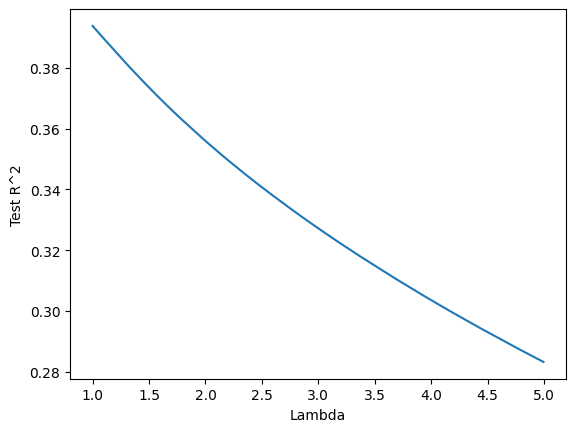

In [277]:
from sklearn.linear_model import HuberRegressor
# HUBER Model with Cross Validation
data = []
for i in np.arange(1,5,0.005):
    temp_model = HuberRegressor(epsilon=20, alpha=i,max_iter=100)
    cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
    test_fold_r2 = cross_val_score(temp_model, df_2015_features, df_2015_target, cv=cross_val, scoring="r2")
    data.append([i, test_fold_r2.mean()])
results_huber = pd.DataFrame(data, columns=['Lambda', "Mean Test R^2"])
plt.plot(results_huber['Lambda'].values, results_huber['Mean Test R^2'].values)
plt.xlabel("Lambda")
plt.ylabel("Test R^2")

results_huber.nlargest(1,"Mean Test R^2")

In [262]:
model_huber_1075 = HuberRegressor(epsilon=1.075,max_iter=20)
cross_val = KFold(n_splits=5, shuffle=True, random_state=100)
test_fold_r2 = cross_val_score(model_huber_1075, df_2015_features, df_2015_target, cv=cross_val, scoring="r2")
print(f"Test fold R^2 Values: {test_fold_r2}")
print(f"Test fold R^2 Mean: {test_fold_r2.mean()}")
print(f"Test fold R^2 STD: {test_fold_r2.std()}")

Test fold R^2 Values: [0.3625081  0.26853516 0.41635301 0.51644763 0.43961286]
Test fold R^2 Mean: 0.4006913522370582
Test fold R^2 STD: 0.08256259061729651


In [272]:
model_huber_1075.fit(df_2015_features, df_2015_target)
df_slopes = pd.DataFrame({"Slope": model_huber_1075.coef_.T}, index=df_2015_features.columns)
df_slopes

,Slope
agriculture_water,2.621720
industry_water,0.584286
domestic_water,-1.412472
water_per_capita,-5.688352
urban_population,0.125871
state_capacity,0.967979
cattle,-0.866732
total_withdrawals,1.309518
cereal_yield,3.182760
control_of_corruption,0.298900
